First, let's import everything we need, and load some RON data:

In [1]:
# Import the Graph Operator - handles data preparation, model creation/recall, hand-off of data to model
from graphchem import GraphOperator

In [2]:
# Other dependencies are for data segmentation, set metric calculations, plotting
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
from matplotlib import pyplot as plt

In [3]:
# Load some RON data
from graphchem.datasets import load_ron
smiles, ron = load_ron()
print(smiles[:3], '\n', ron[:3])

['CCCCO', 'CCO', 'CO'] 
 [[98.0], [109.0], [109.0]]


In [4]:
# Create training, testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    smiles, ron, test_size=0.20, random_state=42
)
print(len(X_train), len(y_train), len(X_test), len(y_test))

246 246 62 62


We need to set up some variables for our training process (i.e. hyper-parameters). In the future, these will be tunable to reduce model error.

In [5]:
training_config = {
    'task': 'graph',
    'valid_size': 0.2,
    'valid_epoch_iter': 1,
    'valid_patience': 64,
    'batch_size': 32,
    'learning_rate': 0.001,
    'lr_decay': 0.0000001,
    'epochs': 500,
    'verbose': 1
}

We also need to define our model's architecture:

In [6]:
model_config = {
    'n_messages': 2,
    'n_hidden': 3,
    'hidden_msg_dim': 128,
    'hidden_dim': 256,
    'dropout': 0.01
}

Now let's initialize the Graph Operator, and train our model:

In [7]:
go = GraphOperator(config=training_config)
go.train(X_train, y_train, model_config=model_config)

/Users/tjkessler/anaconda3/envs/torch_geometric/lib/python3.8/site-packages/graphchem-1.0.0-py3.8.egg/graphchem/operator.py:43: UserWarning: device config value not found: default value set, cpu
  warnings.warn(


Epoch: 0 | Train Loss: 3174.829612264828 | Valid Loss: 861.7907104492188
Epoch: 1 | Train Loss: 1165.079440369898 | Valid Loss: 642.6224975585938
Epoch: 2 | Train Loss: 919.4843127192283 | Valid Loss: 606.8648071289062
Epoch: 3 | Train Loss: 865.5933146574059 | Valid Loss: 606.8648071289062
Epoch: 4 | Train Loss: 733.4801448899873 | Valid Loss: 606.8648071289062
Epoch: 5 | Train Loss: 836.0291237344547 | Valid Loss: 606.8648071289062
Epoch: 6 | Train Loss: 740.8376016422194 | Valid Loss: 528.0057983398438
Epoch: 7 | Train Loss: 825.9645156860352 | Valid Loss: 528.0057983398438
Epoch: 8 | Train Loss: 787.7918375754844 | Valid Loss: 493.9334716796875
Epoch: 9 | Train Loss: 759.6290544782366 | Valid Loss: 493.9334716796875
Epoch: 10 | Train Loss: 748.4509165238361 | Valid Loss: 488.15765380859375
Epoch: 11 | Train Loss: 627.990590621014 | Valid Loss: 423.5652770996094
Epoch: 12 | Train Loss: 636.7110844826211 | Valid Loss: 423.5652770996094
Epoch: 13 | Train Loss: 598.5416228625239 | Vali

Epoch: 110 | Train Loss: 283.08971389459106 | Valid Loss: 217.40382385253906
Epoch: 111 | Train Loss: 410.0002963007713 | Valid Loss: 217.40382385253906
Epoch: 112 | Train Loss: 321.802279102559 | Valid Loss: 217.40382385253906
Epoch: 113 | Train Loss: 300.93630358637597 | Valid Loss: 217.40382385253906
Epoch: 114 | Train Loss: 412.57696470922355 | Valid Loss: 217.40382385253906
Epoch: 115 | Train Loss: 321.3737487792969 | Valid Loss: 217.40382385253906
Epoch: 116 | Train Loss: 264.23513420260684 | Valid Loss: 217.40382385253906
Epoch: 117 | Train Loss: 252.81046641602808 | Valid Loss: 217.40382385253906
Epoch: 118 | Train Loss: 241.752338020169 | Valid Loss: 217.40382385253906
Epoch: 119 | Train Loss: 271.69659579530054 | Valid Loss: 217.40382385253906
Epoch: 120 | Train Loss: 278.50880650111606 | Valid Loss: 217.40382385253906
Epoch: 121 | Train Loss: 345.0726100376674 | Valid Loss: 217.40382385253906
Epoch: 122 | Train Loss: 271.3999652473294 | Valid Loss: 217.40382385253906
Epoch: 

Let's get predictions, then calculate prediction errors for the training and testing subsets:

In [8]:
y_train_pred = go.use(X_train)
y_test_pred = go.use(X_test)

mae_test = median_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = median_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test Set: R2 = {}, MAE = {}'.format(r2_test, mae_test))
print('Train Set: R2 = {}, MAE = {}'.format(r2_train, mae_train))

Test Set: R2 = 0.2753019245810443, MAE = 14.342121124267578
Train Set: R2 = 0.4598423831563342, MAE = 9.118066406250001


And let's plot our results:

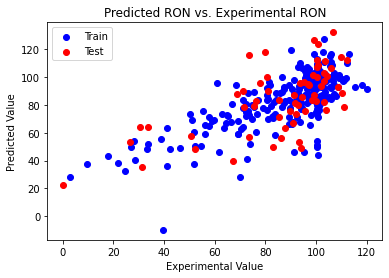

In [9]:
plt.title('Predicted RON vs. Experimental RON')
plt.xlabel('Experimental Value')
plt.ylabel('Predicted Value')
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.legend(loc='upper left')
plt.show()